# Mars Express Power Challenge

[https://kelvins.esa.int/mars-express-power-challenge/](https://kelvins.esa.int/mars-express-power-challenge/)

> The **Mars Express Power Challenge** focuses on the difficult problem of predicting the thermal power consumption. 
> Three full Martian years of [Mars Express](https://www.esa.int/Science_Exploration/Space_Science/Mars_Express/) telemetry are made available and you are challenged to predict the thermal subsystem power consumption on the following Martian year.

<br>based on the code of [github](https://github.com/lfsimoes)

---

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

----

## import libraries

In [12]:
# from echo_state_networks import *

!{sys.executable} -m pip install numpy matplotlib nbformat watermark scipy seaborn pandas scikit-learn tqdm mlflow dvc wget

import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 100


from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 39.3 MB 13.6 MB/s            
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 11.7 MB 580 kB/s             
     |████████████████████████████████| 26.7 MB 11.3 MB/s            
     |████████████████████████████████| 76 kB 2.1 MB/s             
     |████████████████████████████████| 15.6 MB 17.1 MB/s            
     |████████████████████████████████| 401 kB 16.2 MB/s            
  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 503 kB 9.0 MB/s            
     |████████████████████████████████| 306 kB 11.4 MB/s            
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
     |████████████████████████████████| 1.6 MB 12.0 MB/s            
  Using cached gunicorn-20.1.0-py3-none-any.whl (79 kB)
     |████████████████████████████████| 

In [8]:
# import the helper functions: execute notebook and plot
%run helper/functions.ipynb

Defaulting to user installation because normal site-packages is not writeable


----

In [11]:
# https://github.com/rasbt/watermark
%load_ext watermark
%watermark -v -m -p numpy,scipy,matplotlib,seaborn,pandas,scikit-learn,tqdm,mlflow,pandas,wget,dvc

Python implementation: CPython
Python version       : 3.8.2
IPython version      : 8.0.1

numpy       : 1.22.1
scipy       : not installed
matplotlib  : 3.5.1
seaborn     : not installed
pandas      : not installed
scikit-learn: not installed
tqdm        : not installed
mlflow      : not installed
wget        : not installed
dvc         : not installed

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.10.16.3-microsoft-standard-WSL2
Machine     : x86_64
Processor   : 
CPU cores   : 8
Architecture: 64bit



---

# 1. Download and Load Data

In [13]:
INPUT_DOWNLOAD_LOCAL = True
if ('INPUT_DOWNLOAD' in globals() and INPUT_DOWNLOAD) or INPUT_DOWNLOAD_LOCAL:
    print("Downloading and loading data")
    execute_notebook("create_dataset/", "load_dataset.ipynb")

Defaulting to user installation because normal site-packages is not writeable


--2022-02-01 11:07:49--  https://live.kelvins.esa.int/media/public/competitions/mars-express-power-challenge/mars-express-power-3years.zip
Resolving live.kelvins.esa.int (live.kelvins.esa.int)... 195.169.140.114, 131.176.243.100, 131.176.243.101, ...
Connecting to live.kelvins.esa.int (live.kelvins.esa.int)|195.169.140.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153724228 (147M) [application/zip]
Saving to: ‘../../data/mars-express-power-3years.zip’

     0K .......... .......... .......... .......... ..........  0%  755K 3m19s
    50K .......... .......... .......... .......... ..........  0% 5.07M 1m54s
   100K .......... .......... .......... .......... ..........  0% 3.92M 88s
   150K .......... .......... .......... .......... ..........  0% 10.5M 70s
   200K .......... .......... .......... .......... ..........  0% 7.88M 59s
   250K .......... .......... .......... .......... ..........  0% 11.7M 52s
   300K .......... .......... .......... ....

power cols
NPWD2372 NPWD2401 NPWD2402 NPWD2451 NPWD2471 NPWD2472 NPWD2481 NPWD2482 NPWD2491 NPWD2501 NPWD2531 NPWD2532 NPWD2551 NPWD2552 NPWD2561 NPWD2562 NPWD2691 NPWD2692 NPWD2721 NPWD2722 NPWD2742 NPWD2771 NPWD2791 NPWD2792 NPWD2801 NPWD2802 NPWD2821 NPWD2851 NPWD2852 NPWD2871 NPWD2872 NPWD2881 NPWD2882
saaf cols
sa sx sy sz
ltdata cols
sunmars_km earthmars_km sunmarsearthangle_deg solarconstantmars eclipseduration_min occultationduration_min
dmop cols
AAA HHH MMM OOO PSF PWF SEQ SSS SXX TMB TTT VVV XXX ACF DMC DMF
CPU times: user 42.5 s, sys: 0 ns, total: 42.5 s
Wall time: 42.5 s
ftl cols
utb_ms ute_ms type flagcomms


In [14]:
file_name = 'mars-express-power-3years'

folder = '../data'
PATH_TO_DATA = folder + "/" + file_name + "/"

PATH_TRAIN_TO_PKL = PATH_TO_DATA + 'preprocessed/'
NAME_TRAIN_Y_TO_PKL = 'train_y.pkl'
NAME_TRAIN_X_TO_PKL = 'train_x.pkl'

# 2. Analyze data

A detailed explaination of the data is in the [Mars Express Power Challenge](https://kelvins.esa.int/mars-express-power-challenge/data/).

In this process, we also prune some rarely occuring event on the FTL files

Analyzing the data
Defaulting to user installation because normal site-packages is not writeable
Power thermal
                     NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  \
ut_ms                                                                   
2008-08-22 00:00:00  0.133582  0.001552  0.175436  0.657240  0.000747   
2008-08-22 01:00:00  0.217001  0.001498  0.175888  0.854918  0.000717   
2008-08-22 02:00:00  0.155922  0.001503  0.175389  1.079016  0.000719   

                     NPWD2472  NPWD2481  NPWD2482  NPWD2491  NPWD2501  ...  \
ut_ms                                                                  ...   
2008-08-22 00:00:00  0.000661  0.000585  0.001927  0.244648  0.005277  ...   
2008-08-22 01:00:00  0.000628  0.000551  0.001834  0.230870  0.005010  ...   
2008-08-22 02:00:00  0.000636  0.000568  0.001856  0.202746  0.005135  ...   

                     NPWD2792  NPWD2801  NPWD2802  NPWD2821  NPWD2851  \
ut_ms                                                      

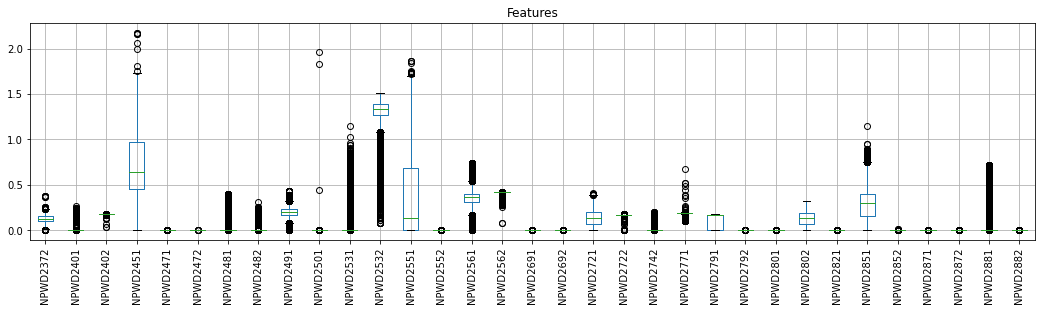

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65613 entries, 2008-08-22 00:00:00 to 2016-02-29 23:00:00
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NPWD2372  49125 non-null  float64
 1   NPWD2401  49125 non-null  float64
 2   NPWD2402  49125 non-null  float64
 3   NPWD2451  49125 non-null  float64
 4   NPWD2471  49125 non-null  float64
 5   NPWD2472  49125 non-null  float64
 6   NPWD2481  49125 non-null  float64
 7   NPWD2482  49125 non-null  float64
 8   NPWD2491  49125 non-null  float64
 9   NPWD2501  49125 non-null  float64
 10  NPWD2531  49125 non-null  float64
 11  NPWD2532  49125 non-null  float64
 12  NPWD2551  49125 non-null  float64
 13  NPWD2552  49125 non-null  float64
 14  NPWD2561  49125 non-null  float64
 15  NPWD2562  49125 non-null  float64
 16  NPWD2691  49125 non-null  float64
 17  NPWD2692  49125 non-null  float64
 18  NPWD2721  49125 non-null  float64
 19  NPWD2722  49125 non-null  float6

/tmp/ipykernel_13144/961772833.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  test_plot.hist(ax = ax)


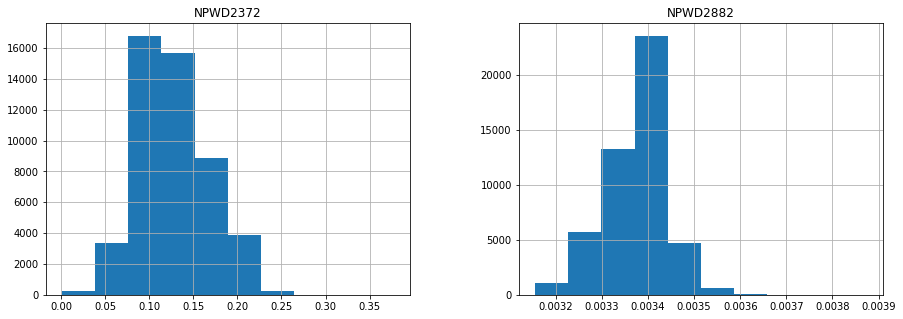

SAAF
                            sa         sx         sy          sz
ut_ms                                                           
2008-08-22 00:00:00   0.339355  14.551129  90.339355  104.548871
2008-08-22 01:00:00   6.619310  18.012184  90.500460   90.396437
2008-08-22 02:00:00  30.927137  37.511806  64.618150   86.910793

saaf [min, max] = [ 0.0 ,  179.88916666666668 ]

LTDATA
              sunmars_km  earthmars_km  sunmarsearthangle_deg  \
ut_ms                                                           
2008-08-22  2.419389e+08  3.557560e+08              19.565076   
2008-08-23  2.418002e+08  3.563037e+08              19.390075   
2008-08-24  2.416603e+08  3.568432e+08              19.214734   

            solarconstantmars  eclipseduration_min  occultationduration_min  
ut_ms                                                                        
2008-08-22         522.263999             4.166667                27.400000  
2008-08-23         522.863537             1.783333   

In [15]:
INPUT_DOWNLOAD_LOCAL = True
if ('INPUT_DOWNLOAD' in globals() and INPUT_DOWNLOAD) or INPUT_DOWNLOAD_LOCAL:
    print("Analyzing the data")
    execute_notebook("create_dataset/", "analyze_dataset.ipynb")

### 1. Load the QC

### 2. Applying the QC1 to all the features:

In [16]:
power_all
saaf_all
ltdata_all
dmop_all
ftl_df

,flagcomms,ACROSS_TRACK,D1PVMC,D2PLND,D3POCM,D4PNPO,D5PPHB,D7PLTS,D8PLTP,D9PSPO,EARTH,INERTIAL,MAINTENANCE,NADIR,NADIR_LANDER,RADIO_SCIENCE,SLEW,SPECULAR,SPOT,WARMUP
ut_ms,,,,,,,,,,,,,,,,,,,,
2008-08-22 00:00:00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2008-08-22 01:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2008-08-22 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2008-08-22 03:00:00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2008-08-22 04:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-29 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-29 20:00:00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2016-02-29 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## QG1-QC2: Fill gaps

    The explanatory features must have the same sampling as the predicted feature. 

They are different techniques:

* nearest value
* fill with zero value
* mean between the nearest value

**Current approach**:

We apply a fill gap technique to specific features f


In [17]:
print("df: ", df.shape)
print("power: ", power_all.shape)
print("saaf: ",saaf_all.shape)
print("ltdata: ", ltdata_all.shape)
print("dmop: ", dmop_all.shape)

df:  (65613, 33)
power:  (65613, 33)
saaf:  (63540, 4)
ltdata:  (2748, 6)
dmop:  (65618, 16)


### 1. Load and execute the QC

In [18]:
# Make sure that saaf has the same sampling as the power, fill gaps with nearest value
saaf_all = saaf_all.reindex(df.index, method="nearest")
ltdata_all = ltdata_all.reindex(df.index, method="nearest")

# Make sure that dmop_all has the same sampling as the power, fill NA with zero value
dmop_all = dmop_all.reindex(df.index).fillna(0)

### 2. Looking the data

In [19]:
print("df: ", df.shape)
print("power: ", power_all.shape)
print("saaf: ",saaf_all.shape)
print("ltdata: ", ltdata_all.shape)
print("dmop: ", dmop_all.shape)

df:  (65613, 33)
power:  (65613, 33)
saaf:  (65613, 4)
ltdata:  (65613, 6)
dmop:  (65613, 16)


**FTL files**

We don't perform any modification to the FTL files.

In [20]:
print("ftl_df: ", ftl_df.shape)
print("ftl_df_sel: ", ftl_df_sel.shape)

ftl_df:  (65613, 20)
ftl_df_sel:  (65613, 11)


---

# 4. Store the dataset

We formulate the prediction problem `Y = f(X)`

* `Y` is the matrix that we want to predict
* `X` is the explanatory feature

## Join all the explanatory features

In [21]:
df = df.join(saaf_all)
df = df.join(ltdata_all)
df = df.join(dmop_all)
df = df.join(ftl_df_sel)
df.shape

(65613, 70)

In [22]:
Y = df[power_cols]
X = df.drop(power_cols, axis=1)

store X and Y to send it to the step 2 of the pipeline, Build Model.

In [23]:
# if the directory does not exist, we create it
if not os.path.exists(PATH_TRAIN_TO_PKL):
    os.mkdir(PATH_TRAIN_TO_PKL)

FULL_TRAIN_Y_TO_PKL = os.path.join(PATH_TRAIN_TO_PKL, NAME_TRAIN_Y_TO_PKL)
FULL_TRAIN_X_TO_PKL = os.path.join(PATH_TRAIN_TO_PKL, NAME_TRAIN_X_TO_PKL)

Y.to_pickle(FULL_TRAIN_Y_TO_PKL)
X.to_pickle(FULL_TRAIN_X_TO_PKL)

---